In [22]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import sys
from six.moves import cPickle as pickle
from skimage.io import imread, imsave
%matplotlib inline

In [7]:
pickle_file = 'test_metadata.pickle'
test_metadata = {}

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    test_metadata = save
    del save  # hint to help gc free up memory

In [5]:
pickle_file = 'train_metadata.pickle'
train_metadata = {}

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_metadata = save
    del save  # hint to help gc free up memory

In [6]:
len(train_metadata['label'])

33402

In [8]:
len(test_metadata['label'])

13068

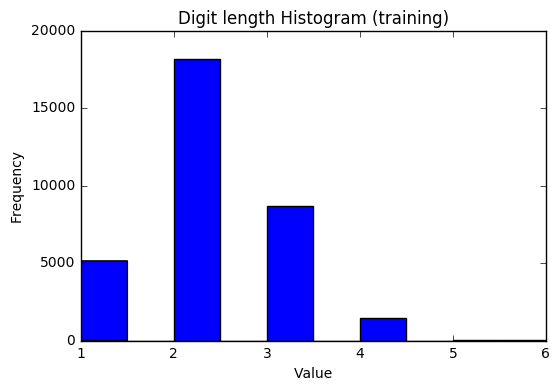

average length is 2.19319202443, sd is 0.742491945918
max length is 6, and min length is 1
percentage of length smaller than 6 is 0.999970061673


In [73]:
tr_len = np.asarray([len(s) for s in train_metadata['label']])
plt.hist(tr_len)
plt.title("Digit length Histogram (training)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

#fig = plt.gcf()

#plot_url = py.plot_mpl(fig, filename='mpl-basic-histogram')

print 'average length is {}, sd is {}'.format(np.mean(tr_len), np.std(tr_len))
print 'max length is {}, and min length is {}'.format(np.max(tr_len), np.min(tr_len))
print 'percentage of length smaller than 6 is {}'.format(np.mean(1.0*(tr_len<6)))

In [17]:
train_root = 'train'
test_root = 'test'

train_list =[train_root + '/' + x for x in os.listdir(train_root) ]
test_list =[test_root + '/' + x for x in os.listdir(test_root) ]

train_list = [s for s in train_list if '.png' in s]
test_list = [s for s in test_list if '.png' in s]

In [18]:
len(train_list)

33402

In [20]:
def extract_info(file_list, metadata):
    
    #img hight, img width, box top, box left, box height, box width
    info = np.ndarray(shape=(len(file_list), 6), dtype=np.float32)
    
    for i in range(len(file_list)):
        img = imread(file_list[i])
        info[i,0], info[i,1] = img.shape[0], img.shape[1]
        
        info[i,2] = np.min(np.asarray(metadata['top'][i]))
        info[i,3] = np.min(np.asarray(metadata['left'][i]))
        
        info[i,4] = np.max(np.asarray(metadata['top'][i]) 
                           + np.asarray(metadata['height'][i])) - info[i,2]
        info[i,5] = np.max(np.asarray(metadata['left'][i]) 
                           + np.asarray(metadata['width'][i])) - info[i,3]
        
    return info

In [23]:
train_size = len(train_metadata['label'])
file_list = ['train/' + str(x+1) + '.png' for x in range(train_size)]

train_info = extract_info(file_list, train_metadata)

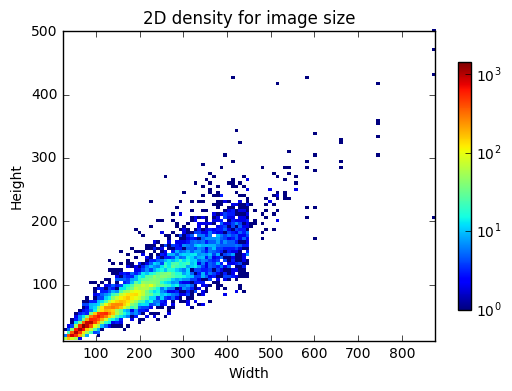

average size is 128.284988403x57.2130126953
percentage of image smaller than 450 x 250 is 0.997095982277


In [65]:
from matplotlib.colors import LogNorm

x = train_info[:,1]
y = train_info[:,0]
counts,ybins,xbins,image = plt.hist2d(x,y,bins=100,norm=LogNorm())
#cs = plt.contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=0.5)
#plt.colorbar(cs,shrink=0.8,extend='both')

plt.title("2D density for image size")
plt.xlabel("Width")
plt.ylabel("Height")

plt.colorbar(image, orientation='vertical', shrink=0.8)
plt.show()

print 'average size is {0}x{1}'.format(np.mean(x),np.mean(y))
print 'percentage of image smaller than 450 x 250 is {}'.format(np.mean(1.0*(x<450) *(y<250)))

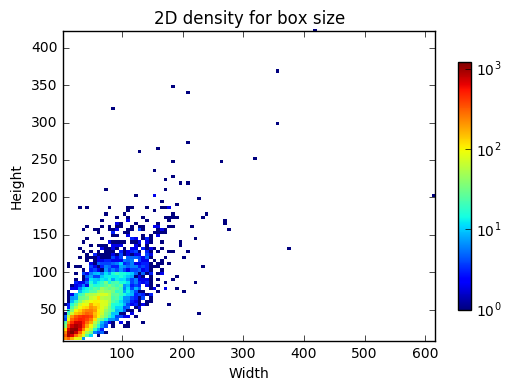

average size is 36.256603241x37.0859222412
percentage of box smaller than 150 x 150 is 0.995419435962


In [66]:
from matplotlib.colors import LogNorm

x = train_info[:,5]
y = train_info[:,4]
counts,ybins,xbins,image = plt.hist2d(x,y,bins=100,norm=LogNorm())
#cs = plt.contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=0.5)
#plt.colorbar(cs,shrink=0.8,extend='both')

plt.title("2D density for box size")
plt.xlabel("Width")
plt.ylabel("Height")

plt.colorbar(image, orientation='vertical', shrink=0.8)
plt.show()

print 'average size is {0}x{1}'.format(np.mean(x),np.mean(y))
print 'percentage of box smaller than 150 x 150 is {}'.format(np.mean(1.0*(x<150) *(y<150)))